In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats
import scipy.signal as sg
import pickle

import matplotlib as mpl
import matplotlib.cm  as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import plot_recipes as pr

In [2]:
with Dataset(f'../netcdf/Model/gigatl1_1h_tides_para_7063_lucky_mooring_64.nc', 'r') as nc:
        time = nc['time'][:]
        print(nc.variables.keys())
        lon = np.array(nc['lon'][:])
        lat = np.array(nc['lat'][:])
        z = np.array(nc['z'][:])
        time = np.array(nc['time'][:])
        temp = np.array(nc['temp'][:])
        u = np.array(nc['u'][:])
        v = np.array(nc['v'][:])

odict_keys(['lon', 'lat', 'sig', 'time', 'temp', 'salt', 'u', 'v', 'z'])


In [3]:
dt = time[1] - time[0]
dt/3600 # hours

3.0

In [4]:
pd.to_datetime(time)

DatetimeIndex(['1970-01-01 00:00:00.906778736',
               '1970-01-01 00:00:00.906789536',
               '1970-01-01 00:00:00.906800336',
               '1970-01-01 00:00:00.906811136',
               '1970-01-01 00:00:00.906821936',
               '1970-01-01 00:00:00.906832736',
               '1970-01-01 00:00:00.906843536',
               '1970-01-01 00:00:00.906854336',
               '1970-01-01 00:00:00.906865136',
               '1970-01-01 00:00:00.906875936',
               ...
               '1970-01-01 00:00:00.921358736',
               '1970-01-01 00:00:00.921369536',
               '1970-01-01 00:00:00.921380336',
               '1970-01-01 00:00:00.921391136',
               '1970-01-01 00:00:00.921401936',
               '1970-01-01 00:00:00.921412736',
               '1970-01-01 00:00:00.921423536',
               '1970-01-01 00:00:00.921434336',
               '1970-01-01 00:00:00.921445136',
               '1970-01-01 00:00:00.921455936'],
              dtype=

In [5]:
lat

array([37.28162615])

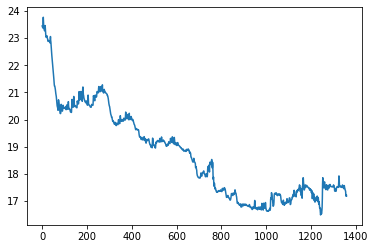

In [6]:
plt.plot(temp[:, 99, 0, 0])

In [7]:
depth = z[0, :, 0, 0]
tt = np.linspace(0, 1360, 1360)

In [8]:
xx,yy = np.mgrid[slice(0, 1360, 1), slice(-1750, 0, 17.5)]

In [9]:
z[0, 0]

array([[-1763.83119007]])

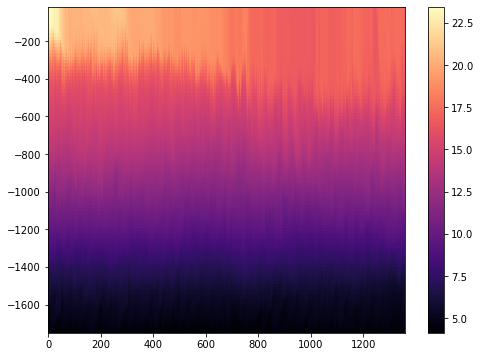

In [10]:
plt.figure(figsize=(8,6))
plt.pcolormesh(xx,yy, temp[:,:, 0, 0], cmap='magma')
plt.colorbar()

M2 = 1.951219512195122


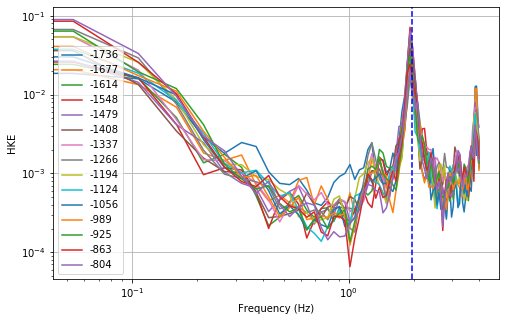

In [11]:
plt.figure(figsize=(8,5))
window_size = 150
levels = range(1,30,2)
temp_psd = {}

for l in levels:
    T = temp[:, l, 0, 0]
    dt = (time[1] - time[0])/(3600*24) #days
    depth = -int(z[0,l][0][0])
    freq, psd = sg.welch(T, fs=1./dt, nperseg=window_size, noverlap=0)
    aux={'freq': freq, 'psd':psd}
    temp_psd[depth] = aux
    plt.loglog(freq, psd, label=f'{z[0,l,0,0]:.0f}')

M2 = 24/(12.3) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'HKE')
plt.legend()

M2 = 1.951219512195122


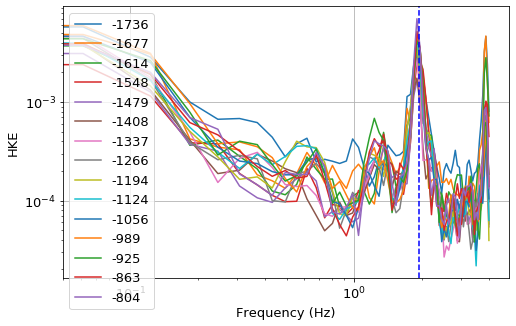

In [39]:
plt.figure(figsize=(8,5))
window_size = 130
levels = range(1,30,2)
KE_psd = {}

for l in levels:
    speed = np.sqrt(u[:, l, 0, 0]**2 + v[:, l, 0, 0]**2)
    dt = (time[1] - time[0])/(3600*24) #days
    depth = -int(z[0,l][0][0])
    freq, psd = sg.welch(speed, fs=1./dt, nperseg=window_size, noverlap=0)
    #freq, psd = sg.periodogram(speed, fs=1./dt)
    aux={'freq': freq, 'psd':psd}
    KE_psd[depth] = aux
    plt.loglog(freq, psd, label=f'{z[0,l,0,0]:.0f}')

M2 = 24/(12.3) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')
#plt.ylim(1e-8, 1e0)

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'HKE')
plt.legend()

In [30]:
year = 2019
instrument = 'rbr'
path = f'../support_data/PowerSpectra/psd_{instrument}_{year}'
with open(path, 'rb') as f:
    PowerSpectra= pickle.load(f)

In [31]:
temp_psd.keys()

dict_keys([1735, 1676, 1613, 1547, 1478, 1408, 1337, 1265, 1194, 1124, 1055, 989, 924, 862, 803])

In [32]:
PowerSpectra.keys()

dict_keys([800.0, 900.0, 1200.0, 1300.0, 1350.0, 1490.0, 1540.0, 1580.0, 1620.0, 1660.0])

In [33]:
d_moor = [800, 1200, 1540, 1660]
d_mod = [803, 1194, 1547, 1676]

Text(-0.01, 0.5, 'Temperature PSD ($\\degree C^2 / cpd$)')

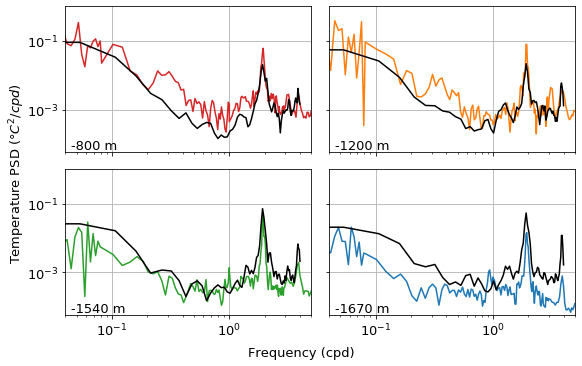

In [34]:
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, tight_layout=True, figsize=(8,5))

ax0 = axes[0,0]
ax0.loglog(PowerSpectra[d_moor[0]]['freq'], PowerSpectra[d_moor[0]]['psd'], c='tab:red')
ax0.loglog(temp_psd[d_mod[0]]['freq'], temp_psd[d_mod[0]]['psd'], c='k')
ax0.set_xlim(4e-2, 5e0)
ax0.set_ylim(6e-5, 1e0)
ax0.grid()
ax0.text(4.5e-2, 7e-5, '-800 m')

ax1 = axes[0,1]
ax1.loglog(PowerSpectra[d_moor[1]]['freq'], PowerSpectra[d_moor[1]]['psd'], c='tab:orange')
ax1.loglog(temp_psd[d_mod[1]]['freq'], temp_psd[d_mod[1]]['psd'], c='k')
ax1.grid()
ax1.text(4.5e-2, 7e-5, '-1200 m')

ax2 = axes[1,0]
ax2.loglog(PowerSpectra[d_moor[2]]['freq'], PowerSpectra[d_moor[2]]['psd'], c='tab:green')
ax2.loglog(temp_psd[d_mod[2]]['freq'], temp_psd[d_mod[2]]['psd'], c='k')
ax2.grid()
ax2.text(4.5e-2, 7e-5, '-1540 m')

ax3 = axes[1,1]
ax3.loglog(PowerSpectra[d_moor[3]]['freq'], PowerSpectra[d_moor[3]]['psd'], c='tab:blue')
ax3.loglog(temp_psd[d_mod[3]]['freq'], temp_psd[d_mod[3]]['psd'], c='k')
ax3.grid()
ax3.text(4.5e-2, 7e-5, '-1670 m')

fig.text(0.5, -0.01, 'Frequency (cpd)', ha='center', fontsize = 13)
fig.text(-0.01, 0.5, 'Temperature PSD ($\degree C^2 / cpd$)', va='center', rotation='vertical', fontsize = 13)

In [35]:
with open('../support_data/PowerSpectra/psd_aquadopp_2019', 'rb') as f:
    power_spect = pickle.load(f)
    
HKE = power_spect['speed']

pharmaceutical industries, fishing industries and mininig companies blockbuster drug

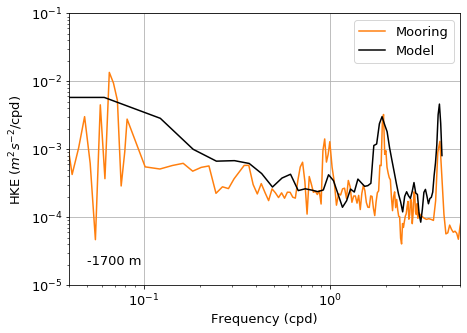

In [40]:
plt.rcParams.update({'font.size': 13})
fig = plt.figure(figsize=(7,5))
ax = plt.subplot()
ax.loglog(HKE['freq'], HKE['psd'], c='tab:orange', label='Mooring')
ax.loglog(KE_psd[1735]['freq'], KE_psd[1735]['psd'], c='k', label='Model')
ax.set_ylim(1e-5, 1e-1)
ax.set_xlim(4e-2, 5e0)
ax.set_xlabel('Frequency (cpd)')
ax.set_ylabel(r'HKE ($m^2 s^{-2}$/cpd)')
ax.grid()
ax.legend()
ax.text(5e-2, 2e-5, '-1700 m')
plt.savefig('../figures/PowerSpectra/model/HKE_model', facecolor=(1,0,0,0))